In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

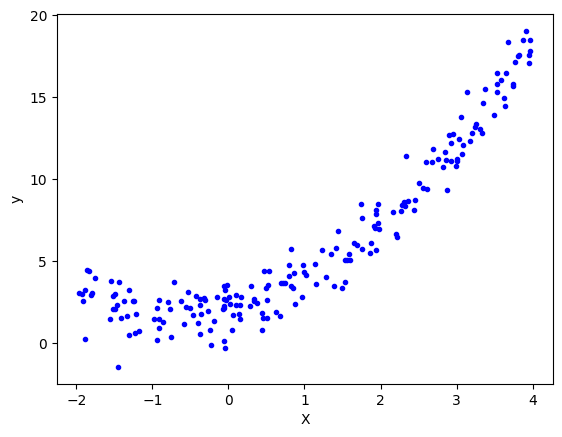

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
X = 6*np.random.rand(200, 1)-2
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


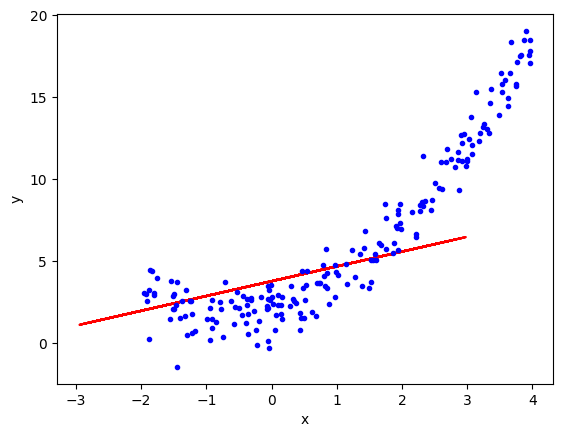

In [21]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


lr = LinearRegression()
lr.fit(X_train, y_train)   

plt.plot(X_train, lr.predict(X_train), color='r')  
plt.plot(X, y, 'b.')                               
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)


0.7080911113454271

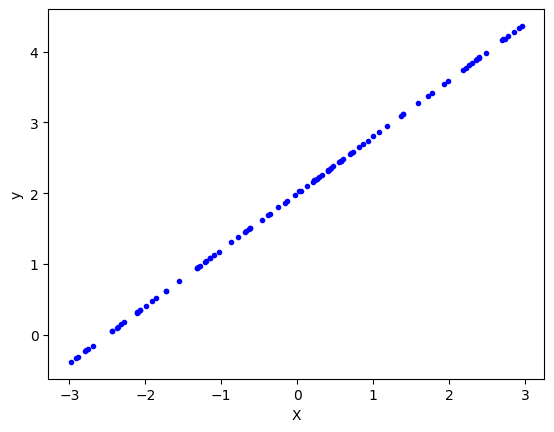

In [26]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(100, 1) - 3
y = 0.8 * X + 2

plt.plot(X, y, 'b.')  # blue dots
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [28]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.fit_transform(X_test)
print(X_train[0])
print(X_train_trans[0])

[-1.44360211]
[ 1.         -1.44360211  2.08398706]


In [30]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [32]:
y_pred=lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.9254752090134672

In [33]:
print(lr.coef_)
print(lr.intercept_)

[[0.         1.00043741 0.77732263]]
[2.08531911]


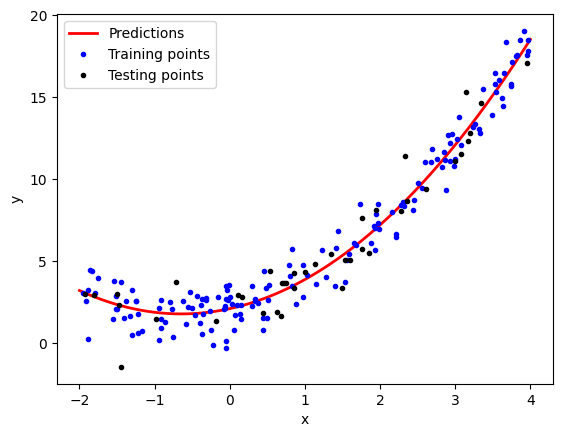

In [35]:
X_new=np.linspace(-2,4,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=lr.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth=2, label="Predictions")
plt.plot(X_train, y_train, 'b.', label="Training points")
plt.plot(X_test, y_test, 'k.', label="Testing points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### Polynomial Regression

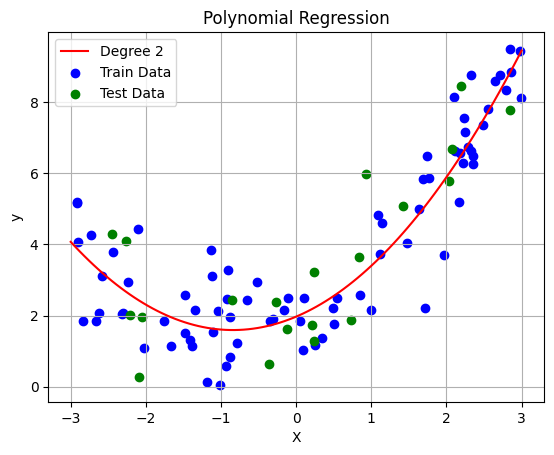

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = np.random.rand(100, 1) * 6 - 3     
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    polynomial_model = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    
    polynomial_model.fit(X_train, y_train)
    y_new = polynomial_model.predict(X_new)

    plt.plot(X_new, y_new, 'r', label=f"Degree {degree}")
    plt.scatter(X_train, y_train, color='blue', label="Train Data")
    plt.scatter(X_test, y_test, color='green', label="Test Data")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.title("Polynomial Regression")
    plt.grid(True)
    plt.show()


polynomial_regression(2)


### Applying Polynomial Linear Regression

In [13]:
poly=PolynomialFeatures(degree=44,include_bias=False)
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [37]:
print(X_train[0])
print(X_train_trans[0])

[0.05582144]
[ 1.         -1.44360211  2.08398706]
